## Statistical Testing

In order to test our hypothesis, we need to conduct statistical tests to determine whether our independent variable which is investor attention (name_price_attentino) has a statistically significant relationship with the target variable of returns (pct_return)

### Data Prepping 

Adding the dataframe we will be working with - which is the combined dataframe which includes financial information as well as the attention proxies


In [138]:
df = pd.read_csv("combined_financial_data.csv", index_col=0)
df.head()

,date,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,ticker_attention,name_price_attention
0,2014-01-02,10107,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,37.25,308428000.0,-0.6683,3.25,3.15
1,2014-01-03,10107,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.91,306353000.0,-0.6728,3.38,1.54
2,2014-01-06,10107,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.50,299879000.0,-2.1133,4.03,2.24
3,2014-01-07,10107,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.35,302203000.0,0.7750,4.94,1.19
4,2014-01-08,10107,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.86,296808000.0,-1.7852,5.33,1.68


We see daily volatility is not in the dataset, therefore adding it using the formula
$$
\text{Daily Volatility} = \text{Daily Close} - \text{Daily Open}
$$

Daily volatility along wiht market cap and volume can behave as controls

In [139]:
df['daily_volatility'] = df['price'] - df['open']
df.head()

,date,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,ticker_attention,name_price_attention,daily_volatility
0,2014-01-02,10107,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,37.25,308428000.0,-0.6683,3.25,3.15,-0.190
1,2014-01-03,10107,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.91,306353000.0,-0.6728,3.38,1.54,-0.290
2,2014-01-06,10107,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.50,299879000.0,-2.1133,4.03,2.24,-0.720
3,2014-01-07,10107,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.35,302203000.0,0.7750,4.94,1.19,0.085
4,2014-01-08,10107,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.86,296808000.0,-1.7852,5.33,1.68,-0.240


Creating X and y for statistical testing as well as to split for training and testing

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
fix_seed = 42

X = df[['name_price_attention']]
y = df['return']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=fix_seed)


### OLS Regression Analysis 

OLS regression helps to understand how one or more independent variables predict the outcome of a dependent variable, by minimizing the sum of the squared differences between the observed and predicted values.

We will run 8 models which will be various combinations of the 4 independent variables we are focusing on - attention, market cap, volume and volatility 

* model 1 - attention only 
* model 2 - attention plus mkt cap
* model 3 - attention plus volume
* model 4 - attention plus volatility
* model 5 - attention plus mkt cap and volume 
* model 6 - attention plus mkt cap and volatility
* model 7 - attention plus volatility and volume 
* model 8 - all 4 


add anomolies durign regression 
end - display the regresssion table/summary 

#### Model 1: Attention Only

In [116]:
# Adding a constant term to the model (intercept)
X = sm.add_constant(X) 

# Fit the OLS model
model = sm.OLS(y, X)
result = model.fit()

# Print the summary of the regression results
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.507
Date:                Thu, 29 Feb 2024   Prob (F-statistic):            0.00205
Time:                        18:14:58   Log-Likelihood:             1.6768e+05
No. Observations:               64008   AIC:                        -3.354e+05
Df Residuals:                   64006   BIC:                        -3.353e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0004 

The OLS Analysis aims to explore the relationship between the independent variable name_price_attention and the target variable pct_return. While findings such as the R-square value show that the model is not a good fit, the p-value of less than 0.05 for the variable indicates a statistically significant association between our independent and dependent variable while keeping other values not included in the model constant. This suggests that, while minimal, there is a noticeable impact of changes in name_price_attention on the return.

Now adding controls and seeing how that impacts the p-value for our attention variable

#### Model 2: Attention and Market cap

Looking at controls such as volume, volatility and mkt_cap, let us see if that improves the model or impacts the p-value


In [133]:
#model 2: attention and market cap
# Adding a constant term to the model (intercept)
X2 = df[['name_price_attention', 'mkt_cap']]
X2 = sm.add_constant(X2) 

# Fit the OLS model
model2 = sm.OLS(y, X2)
m2_result = model2.fit()

# Print the summary of the regression results
print(m2_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.666
Date:                Fri, 01 Mar 2024   Prob (F-statistic):            0.00127
Time:                        16:03:55   Log-Likelihood:             1.6768e+05
No. Observations:               64008   AIC:                        -3.354e+05
Df Residuals:                   64005   BIC:                        -3.353e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0003 

#### Model 3: Attention and Volume


In [134]:
#model 3: attention and volume
# Adding a constant term to the model (intercept)
X3 = df[['name_price_attention', 'volume']]
X3 = sm.add_constant(X3) 

# Fit the OLS model
model3 = sm.OLS(y, X3)
m3_result = model3.fit()

# Print the summary of the regression results
print(m3_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     13.81
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           1.00e-06
Time:                        16:03:57   Log-Likelihood:             1.6769e+05
No. Observations:               64008   AIC:                        -3.354e+05
Df Residuals:                   64005   BIC:                        -3.353e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0006 

#### Model 4: Attention and Daily Volatility


In [141]:
# Adding a constant term to the model (intercept)
X4 = df[['name_price_attention', 'daily_volatility']]
X4 = sm.add_constant(X4) 

# Fit the OLS model
model4 = sm.OLS(y, X4)
m4_result = model4.fit()

# Print the summary of the regression results
print(m4_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                 1.233e+04
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:23:21   Log-Likelihood:             1.7810e+05
No. Observations:               64008   AIC:                        -3.562e+05
Df Residuals:                   64005   BIC:                        -3.562e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0004 

#### Model 5: Attention, Market Cap and Volume


In [143]:
# Adding a constant term to the model (intercept)
X5 = df[['name_price_attention', 'mkt_cap', 'volume']]
X5 = sm.add_constant(X5) 

# Fit the OLS model
model5 = sm.OLS(y, X5)
m5_result = model5.fit()

# Print the summary of the regression results
print(m5_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     18.45
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           5.89e-12
Time:                        16:25:02   Log-Likelihood:             1.6770e+05
No. Observations:               64008   AIC:                        -3.354e+05
Df Residuals:                   64004   BIC:                        -3.354e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0004 

#### Model 6: Attention, Market Cap and Daily Volatility

In [146]:
# Adding a constant term to the model (intercept)
X6 = df[['name_price_attention', 'mkt_cap', 'daily_volatility']]
X6 = sm.add_constant(X6) 

# Fit the OLS model
model6 = sm.OLS(y, X6)
m6_result = model6.fit()

# Print the summary of the regression results
print(m6_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     8219.
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:26:53   Log-Likelihood:             1.7811e+05
No. Observations:               64008   AIC:                        -3.562e+05
Df Residuals:                   64004   BIC:                        -3.562e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0003 

#### Model 7: Attention and Daily Volatility


In [145]:
# Adding a constant term to the model (intercept)
X7 = df[['name_price_attention', 'daily_volatility', 'volume']]
X7 = sm.add_constant(X7) 

# Fit the OLS model
model7 = sm.OLS(y, X7)
m7_result = model5.fit()

# Print the summary of the regression results
print(m7_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     18.45
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           5.89e-12
Time:                        16:26:31   Log-Likelihood:             1.6770e+05
No. Observations:               64008   AIC:                        -3.354e+05
Df Residuals:                   64004   BIC:                        -3.354e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0004 

#### Model 8: Attention, Market Cap, Volume and Volatility


In [148]:
# Adding a constant term to the model (intercept)
X8 = df[['name_price_attention', 'mkt_cap','daily_volatility', 'volume']]
X8 = sm.add_constant(X8) 

# Fit the OLS model
model8 = sm.OLS(y, X8)
m8_result = model8.fit()

# Print the summary of the regression results
print(m8_result.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     6177.
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:31:49   Log-Likelihood:             1.7812e+05
No. Observations:               64008   AIC:                        -3.562e+05
Df Residuals:                   64003   BIC:                        -3.562e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0004 

### Regression

Based on the Pearson Correlation and some prior visualizations, we can determine that the data is non-linear therefore Linear Regression is not an option for our data. Therefore we use XXX regression that is found inbuilt in the statsmodels library in Python

About the regression model: XXX

In [18]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [19]:
#importing our df
df = pd.read_csv("combined_financial_data.csv", index_col=0)
df.head()

,date,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,ticker_attention,name_price_attention
0,2014-01-02,10107,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,37.25,308428000.0,-0.6683,3.25,3.15
1,2014-01-03,10107,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.91,306353000.0,-0.6728,3.38,1.54
2,2014-01-06,10107,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.50,299879000.0,-2.1133,4.03,2.24
3,2014-01-07,10107,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.35,302203000.0,0.7750,4.94,1.19
4,2014-01-08,10107,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.86,296808000.0,-1.7852,5.33,1.68


In [149]:
df_test = pd.read_csv("quarterly_financial_data_2013_2023.csv")
df_test.head()


'revenue', 'total_assets', 'earnings_per_share'

,gvkey,datadate,fqtr,tic,conm,net_income,revenue,total_assets,shareholders_equity,total_liabilities,total_debt,sales,operating_activities_cf,capital_expenditures,interest_expense,common_shares_outstanding,earnings_per_share,dividends_per_share
0,1690,2013-03-31,2,AAPL,APPLE INC,9547.0,43603.0,194743.0,135490.0,59253.0,0.0,43603.0,35930.0,4325.0,0.0,940.094,10.16,2.65
1,1690,2013-06-30,3,AAPL,APPLE INC,6900.0,35323.0,199856.0,123354.0,76502.0,16958.0,35323.0,43758.0,6210.0,53.0,908.442,7.51,3.05
2,1690,2013-09-30,4,AAPL,APPLE INC,7512.0,37472.0,207000.0,123549.0,83451.0,16960.0,37472.0,53666.0,8165.0,83.0,899.213,8.31,3.05
3,1690,2013-12-31,1,AAPL,APPLE INC,13072.0,57594.0,225184.0,129684.0,95500.0,16961.0,57594.0,22670.0,1985.0,84.0,892.447,14.59,3.05
4,1690,2014-03-31,2,AAPL,APPLE INC,10223.0,45646.0,205989.0,120179.0,85810.0,16962.0,45646.0,36208.0,3367.0,85.0,861.745,11.69,3.05


### Trying OLS

In [81]:
import statsmodels.api as sm
df2 = df.copy()
# Assuming df, response_column, and training_columns are already defined
# Create the design matrix X
#df2['pct_return_2'] = df[df['pct_return']]
X = df2['name_price_attention']
X = sm.add_constant(X)  # Add a constant term to the model (intercept)

# Create the target variable y
y = df['pct_return']

# Fit the OLS model
model = sm.OLS(y, X)
result = model.fit()

# Print the summary of the regression results
print(result.summary())




                            OLS Regression Results                            
Dep. Variable:             pct_return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.507
Date:                Thu, 29 Feb 2024   Prob (F-statistic):            0.00205
Time:                        14:57:38   Log-Likelihood:            -1.2709e+05
No. Observations:               64008   AIC:                         2.542e+05
Df Residuals:                   64006   BIC:                         2.542e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0418 

We see that the p-value of name_price_attention in 

In [89]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)  # Adjust alpha parameter
ridge.fit(X_train, y_train)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train) 

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)


In [94]:

ridge = Ridge(alpha=1.0)  # Adjust alpha parameter
ridge.fit(X_train, y_train)


Ridge()

In [95]:
print('R squared training set', round(ridge.score(X_train, y_train)*100, 2))
print('R squared test set', round(ridge.score(X_test, y_test)*100, 2))


R squared training set 0.02
R squared test set -0.02


In [96]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = ridge.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = ridge.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))


MSE training set 0.0
MSE test set 0.0


### Gradient Boost Regressor

In [111]:
#splitting the data
from sklearn.model_selection import train_test_split

fix_seed = 32
#X = df['name_price_attention']  # Extracting the feature
X = df[['name_price_attention']]
y = df['pct_return']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=fix_seed)

In [112]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=fix_seed)
gb_regressor.fit(X_train, y_train)


GradientBoostingRegressor(random_state=32)

In [113]:
from sklearn.model_selection import cross_val_score

y_pred = gb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.893335084713147


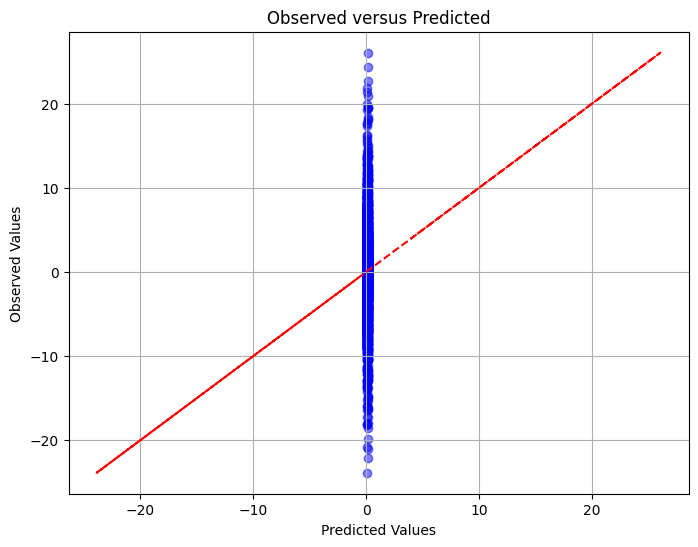

In [37]:
import matplotlib.pyplot as plt

# Plot observed versus predicted values
plt.figure(figsize=(8, 6))
plt.scatter(result.fittedvalues, y, color='blue', alpha=0.5)
plt.plot(y, y, color='red', linestyle='--')  # Plotting the identity line (y = x)
plt.title('Observed versus Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Observed Values')
plt.grid(True)
plt.show()


From visualization and summary we can see that OLS is not a good fit - mostly for linear data and ours is non-linear

### 1 Polynomial Regression

In [43]:
import statsmodels.api as sm
import numpy as np

# Assuming df, response_column, and training_columns are already defined
df2 = df.copy()
X = df2['name_price_attention', 'ticker_attention']  # Extracting the feature
y = df2['return']

X = sm.add_constant(X)
X['attention_squared'] = X['name_price_attention'] ** 2
model = sm.OLS(y,X)
poly_model = model.fit()
print(poly_model.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.826
Date:                Thu, 29 Feb 2024   Prob (F-statistic):            0.00802
Time:                        14:37:36   Log-Likelihood:             1.6768e+05
No. Observations:               64008   AIC:                        -3.354e+05
Df Residuals:                   64005   BIC:                        -3.353e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0004 

### 2. Generalized Additive Models (GAM):


In [39]:
import statsmodels.api as sm

# Assuming df, response_column, and training_columns are already defined

# Fit GAM model
gam_model = sm.GLM(y, X, family=sm.families.Gaussian()).fit()

# Print summary
print(gam_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:             pct_return   No. Observations:                64008
Model:                            GLM   Df Residuals:                    64007
Model Family:                Gaussian   Df Model:                            0
Link Function:               Identity   Scale:                          3.1062
Method:                          IRLS   Log-Likelihood:            -1.2710e+05
Date:                Wed, 28 Feb 2024   Deviance:                   1.9882e+05
Time:                        17:24:40   Pearson chi2:                 1.99e+05
No. Iterations:                     3   Pseudo R-squ. (CS):         -0.0001622
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
name_price_attention     0.0027 

### 3. Nonlinear Least Squares (NLS): (Using LOWESS as an example)


In [42]:
import numpy as np
from scipy.optimize import curve_fit

# Define the model function
def model_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the model to the data
params, covariance = curve_fit(model_func, X, y)

# Extract the parameter estimates
a_fit, b_fit, c_fit = params

# Print the parameter estimates
print("Parameter estimates:")
print("a:", a_fit)
print("b:", b_fit)
print("c:", c_fit)
print(covariance)


Parameter estimates:
a: -0.0680243333213499
b: 0.05660142901558837
c: 0.10150841046372718
[[ 0.0010105   0.00143246 -0.00095267]
 [ 0.00143246  0.0036397  -0.00174575]
 [-0.00095267 -0.00174575  0.00104376]]


### 4. Generalized Linear Models (GLM):

In [ ]:
import statsmodels.api as sm

# Assuming df, response_column, and training_columns are already defined

X = sm.add_constant(df[training_columns])  # Include constant term
y = df[response_column]

# Fit GLM model (e.g., with a gamma distribution and log link function)
glm_model = sm.GLM(y, X, family=sm.families.Gamma()).fit()

# Print summary
print(glm_model.summary())


### Medium trying to determine using shape 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
medium_trial = df[['date', 'return']]

medium_trial.head()

,date,return
0,2014-01-02,-0.006683
1,2014-01-03,-0.006728
2,2014-01-06,-0.021133
3,2014-01-07,0.007750
4,2014-01-08,-0.017852


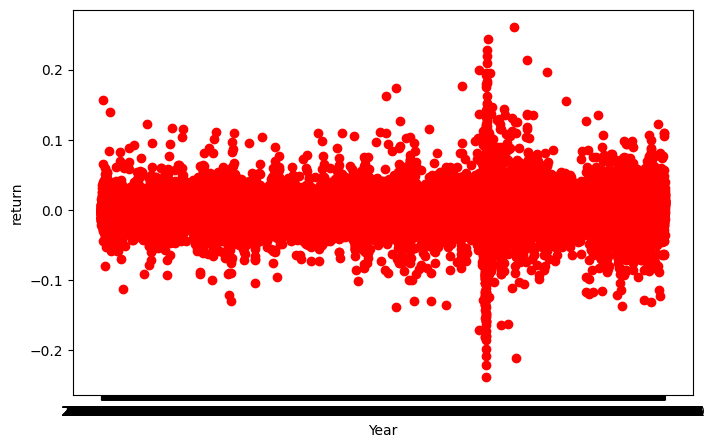

In [17]:
plt.figure(figsize=(8,5))
x_data, y_data = (medium_trial["date"].values, medium_trial["return"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('return')
plt.xlabel('Year')
plt.show()

### RandomForest

In [102]:
#splitting the data
from sklearn.model_selection import train_test_split

fix_seed = 32
#X = df['name_price_attention']  # Extracting the feature
X = df[['name_price_attention']]
y = df['return']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=fix_seed)
type(X)

pandas.core.frame.DataFrame

In [87]:
print(X_train)

       name_price_attention
37310                 27.30
38848                 24.08
57949                 13.64
24082                  8.64
13844                  0.00
...                     ...
20414                 21.12
60284                  5.00
9526                   1.65
42539                 26.65
10967                 27.28

[51206 rows x 1 columns]


In [66]:
rf_regressor = RandomForestRegressor(random_state=fix_seed)


In [68]:
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)


In [69]:
#Statistical Testing

#Mean Squared Error (MSE): It measures the average squared difference between the predicted values and the actual values. Lower values indicate better model performance.

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.00031257620437574084


In [71]:
#R-squared (Coefficient of Determination): It represents the proportion of variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit.

from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print(r_squared)

-0.08497269005853236


In [72]:
#Feature Importance: The RandomForestRegressor provides feature importances, which represent the relative importance of each feature in predicting the target variable.

importances = rf_regressor.feature_importances_
print(importances)

[1.]


In [74]:
#Residual Analysis: Analyzing the residuals (the differences between predicted and actual values) can provide insights into model performance and uncover patterns or trends that the model may have missed.

residuals = y_test - y_pred


In [76]:
#Mean Absolute Error (MAE): It measures the average absolute difference between the predicted values and the actual values.

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

0.01166923092272298


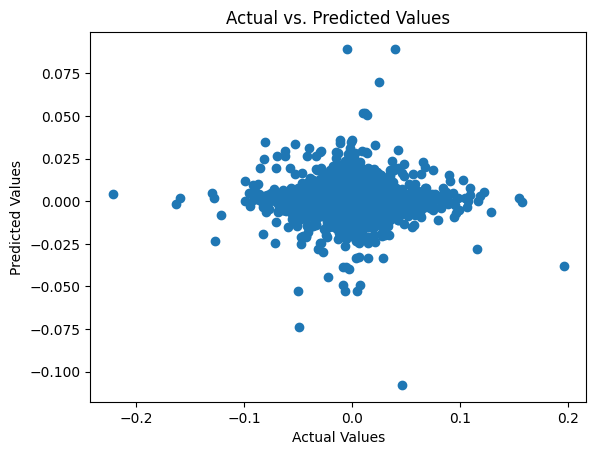

In [78]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#X, y = make_regression(n_features=4, n_informative=2,
#                       random_state=0, shuffle=False)
regr = RandomForestRegressor(random_state=fix_seed)
regr.fit(X, y)
importances = regr.feature_importances_


# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
print(importances)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

[0.8910246  0.25864298 0.01687774 0.18063635 0.89257689 0.0142995
 0.92453382 0.12997104 0.09790944 0.02675424 0.91439547 0.26271135
 0.66617775 0.2082975  0.47286732 0.97613954 0.35028607 0.4283591
 0.98135169 0.01023588 0.27448729 0.24651913 0.66772163 0.12836319
 0.58793143 0.49858526 0.67060485 0.54406628 0.31925952 0.41392651
 0.49794919 0.27806216 0.09680165 0.8296418  0.86689879 0.0678669
 0.96792054 0.88339904 0.54370763 0.18516991 0.20832503 0.18470462
 0.7886272  0.96344831 0.34366138 0.08029241 0.54299538 0.08693732
 0.75101906 0.26404452 0.57499702 0.91491578 0.19866056 0.76187102
 0.05722313 0.96062719 0.5524682  0.44341824 0.13526514 0.71169031
 0.68060146 0.19453928 0.73960802 0.35595374 0.22188837 0.59052506
 0.56163231 0.72712806 0.2457124  0.7731483  0.89396356 0.79711506
 0.28527114 0.3216594  0.75164088 0.76867857 0.61369376 0.99417274
 0.82430007 0.94257479 0.22387647 0.11228766 0.43557614 0.24429197
 0.21906194 0.83483052 0.55808545 0.61181026 0.99908904 0.4896372

In [80]:
df.head()

,date,permno,ticker,price,volume,return,high,low,open,avg_price,mkt_cap,pct_return,ticker_attention,name_price_attention
0,2014-01-02,10107,MSFT,37.16,30423757.0,-0.006683,37.40,37.10,37.350,37.25,308428000.0,-0.6683,3.25,3.15
1,2014-01-03,10107,MSFT,36.91,30944370.0,-0.006728,37.22,36.60,37.200,36.91,306353000.0,-0.6728,3.38,1.54
2,2014-01-06,10107,MSFT,36.13,43111355.0,-0.021133,36.89,36.11,36.850,36.50,299879000.0,-2.1133,4.03,2.24
3,2014-01-07,10107,MSFT,36.41,35478667.0,0.007750,36.49,36.21,36.325,36.35,302203000.0,0.7750,4.94,1.19
4,2014-01-08,10107,MSFT,35.76,59452427.0,-0.017852,36.14,35.58,36.000,35.86,296808000.0,-1.7852,5.33,1.68
